In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 398s 2us/step


In [4]:
print('x_train shape: ', x_train.shape)

x_train shape:  (50000, 32, 32, 3)


In [3]:
print('y_train shape: ', y_train.shape)

y_train shape:  (50000, 1)


In [5]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

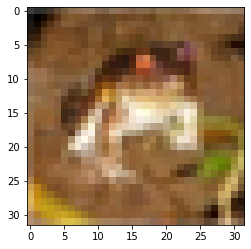

In [9]:
img = plt.imshow(x_train[0])

In [11]:
print('Label: ', y_train[0])

Lavel:  [6]


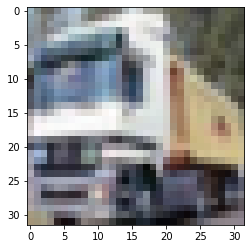

In [12]:
img = plt.imshow(x_train[1])

In [13]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [14]:
print('One hot label: ', y_train_one_hot[1])

One hot label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [19]:
model = Sequential()

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

In [23]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
model.add(Dropout(0.25))

In [27]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [28]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [30]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
model.add(Dropout(0.25))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(512, activation='relu'))

In [34]:
model.add(Dropout(0.5))

In [35]:
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        3

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 158s 126ms/step - loss: 1.8488 - accuracy: 0.3154 - val_loss: 1.1906 - val_accuracy: 0.5702
Epoch 2/20
1250/1250 [==============================] - 162s 129ms/step - loss: 1.2211 - accuracy: 0.5660 - val_loss: 1.0052 - val_accuracy: 0.6444
Epoch 3/20
1250/1250 [==============================] - 152s 122ms/step - loss: 1.0306 - accuracy: 0.6347 - val_loss: 0.8790 - val_accuracy: 0.6920
Epoch 4/20
1250/1250 [==============================] - 162s 130ms/step - loss: 0.9281 - accuracy: 0.6741 - val_loss: 0.8035 - val_accuracy: 0.7178
Epoch 5/20
1250/1250 [==============================] - 163s 130ms/step - loss: 0.8311 - accuracy: 0.7102 - val_loss: 0.7753 - val_accuracy: 0.7317
Epoch 6/20
1250/1250 [==============================] - 143s 115ms/step - loss: 0.7658 - accuracy: 0.7295 - val_loss: 0.7430 - val_accuracy: 0.7418
Epoch 7/20
1250/1250 [==============================] - 142s 114ms/step - loss: 0.7261 - accuracy: 0.7438 - val_

In [41]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 8s 26ms/step - loss: 0.7645 - accuracy: 0.7625


0.762499988079071

In [72]:
model.save('first_model.h5')

In [94]:
# Prediction
pred_img = plt.imread("badge.jpg")

from skimage.transform import resize

pred_img_resized = resize(pred_img, (32, 32, 3))

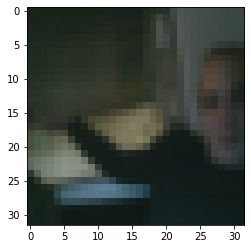

In [95]:
img = plt.imshow(pred_img_resized)

In [96]:
import numpy as np
probabilities = model.predict(np.array( [pred_img_resized,] ))

In [97]:
probabilities

array([[8.9949686e-03, 4.4118840e-02, 1.0573589e-02, 1.4980758e-03,
        1.7841807e-02, 8.9885830e-04, 2.5247157e-02, 6.7754786e-06,
        8.9063400e-01, 1.8594792e-04]], dtype=float32)

In [98]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: ship -- Probability: 0.890634
Second most likely class: automobile -- Probability: 0.04411884
Third most likely class: frog -- Probability: 0.025247157
Fourth most likely class: deer -- Probability: 0.017841807
Fifth most likely class: bird -- Probability: 0.010573589
